# Data Pre-processing, detection and removal of outliers

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import matplotlib.patches as mpatches

# Function to detect outliers using interquartile range

In [73]:
def detect_out_iqr(data, col, col_find, val):
    df_type = data[data[col]==val]
    q25 = df_type[col_find].quantile(0.25)
    q75 = df_type[col_find].quantile(0.75)
    iqr = q75-q25
    upper = q75 + 1.5*iqr
    lower = q25 - 1.5*iqr
    outlier = df_type[(df_type[col_find]>upper) | (df_type[col_find]<lower)].index.values.tolist()
    l = len(outlier)
    if(l>0):
        print(val)
        print(outlier)

# Function to detect outiers using mean and standard deviation

In [49]:
def detect_out_mean_std(data, col, col_find, val):
    df_type = data[data[col]==val]
    mean = df_type[col_find].mean()
    std = df_type[col_find].std()
    upper = mean + 3*std
    lower = mean - 3*std
    outlier = df_type.loc[(df_type[col_find]>upper) | (df_type[col_find]<lower)].index.values.tolist()
    l = len(outlier)
    if(l>0):
        print(val)
        print(outlier)

In [50]:
def remove_outlier_comminapmc(data, col_find):
    apmcs = list(data["APMC"].unique())
    lis=[]
    for apmc in apmcs:
        df_apmc = data[data['APMC']==apmc]
        commodities=list(data["Commodity"].unique())
        #print('\nAPMC: '+apmc)
        for commodity in commodities:
            df_type = data[data['Commodity']==commodity]
            q25 = df_type[col_find].quantile(0.25)
            q75 = df_type[col_find].quantile(0.75)
            iqr = q75-q25
            upper = q75 + 1.5*iqr
            lower = q25 - 1.5*iqr
            outlier = df_type[(df_type[col_find]>upper) | (df_type[col_find]<lower)].index.values.tolist()
            l = len(outlier)
            if(l>0):
                lis.extend(outlier)
    data=data.drop(data.index[lis])
    data.reset_index(drop=True, inplace=True)
    return data

In [51]:
def remove_outlier_comm(data, col_find):
    commodities=data.loc[:,"commodity"].values.tolist()
    comm_set=set(commodities)
    lis=[]
    for commodity in comm_set:
        df_type = data[data['commodity']==commodity]
        q25 = df_type[col_find].quantile(0.25)
        q75 = df_type[col_find].quantile(0.75)
        iqr = q75-q25
        upper = q75 + 3*iqr
        lower = q25 - 3*iqr
        outlier = df_type[(df_type[col_find]>upper) | (df_type[col_find]<lower)].index.values.tolist()
        l = len(outlier)
        if(l>0):
            lis.extend(outlier)
    data=data.drop(data.index[lis])
    data.reset_index(drop=True, inplace=True)
    return data

# Text Pre-processing

In the following function, the text in the text columns has been converted into lower case and with the help of regular expressions only alpha-numeric characters are kept since there was a lot of discripency in the name of the 'Commodity' like at one place it was 'Sugarcane' and at another place it was 'SUGAR-CANE'

In [52]:
def text_process(data, col):
    data[col] = data[col].str.lower()
    data[col] = data[col].apply(lambda x: "".join(re.sub(r"[^A-Za-z\s]", '',str(x))))

# Detecting outliers and removing them in CMO_MSP_Mandi dataset

In [53]:
msp = pd.read_csv(r'G:/SocialCops/CMO_MSP_Mandi.csv')
msp.columns[msp.isna().any()].tolist()
msp.dropna(inplace=True)

In [54]:
msp.describe()

,year,msprice,msp_filter
count,145.000000,145.000000,145.0
mean,2013.868966,2822.448276,1.0
std,1.370600,1441.725928,0.0
min,2012.000000,170.000000,1.0
25%,2013.000000,1470.000000,1.0
50%,2014.000000,2970.000000,1.0
75%,2015.000000,4000.000000,1.0
max,2016.000000,6240.000000,1.0


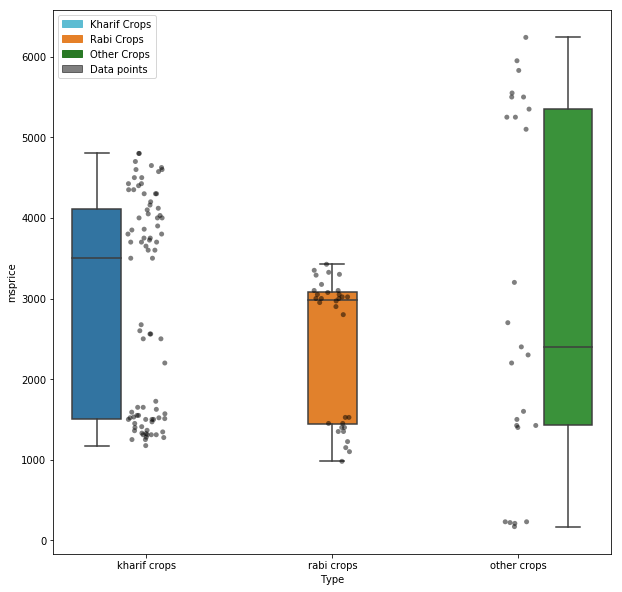

In [72]:
plt.figure(figsize=(10,10))
sns.boxplot(x="Type", y="msprice",hue='Type',data=msp) #box plot
sns.stripplot(y='msprice', x='Type',data=msp,jitter=True,marker='o',alpha=0.5,color='black') #overlay data point
patch_1 = mpatches.Patch(color='#5DBCD2', label='Kharif Crops')
patch_2 = mpatches.Patch(color='#E58028', label='Rabi Crops')
patch_3 = mpatches.Patch(color='#297925', label='Other Crops')
patch_4= mpatches.Patch(color='black', label='Data points',alpha=0.5)
plt.legend(handles=[patch_1,patch_2,patch_3,patch_4])
plt.show()

In [55]:
text_process(data=msp, col='commodity')
text_process(data=msp, col='Type')

In [74]:
msp.head(10)

,commodity,year,Type,msprice,msp_filter
0,paddyunhusked,2012,kharif crops,1250.0,1
1,ricepaddyhus,2012,kharif crops,1280.0,1
2,jowarhybrid,2012,kharif crops,1500.0,1
3,sorgumjawar,2012,kharif crops,1520.0,1
4,bajri,2012,kharif crops,1175.0,1
5,ragimaldandi,2012,kharif crops,1500.0,1
6,spilt gerrn gram,2012,kharif crops,4400.0,1
7,split black gram,2012,kharif crops,4300.0,1
8,cotton,2012,kharif crops,3600.0,1
9,cottonlong staple,2012,kharif crops,3900.0,1


Printing the indexes corresponding to the outlier values under various commodities

In [57]:
commodities=msp.loc[:,"commodity"].values.tolist()
comm_set=set(commodities)
for commodity in comm_set:
    detect_out_iqr(data=msp, col='commodity', col_find='msprice', val=commodity)

soyabean
[15]
grnut kernels
[12]
maize
[5]
pigeon pea tur
[7]


In [58]:
msp=remove_outlier_comm(data=msp, col_find='msprice')

In [59]:
msp.shape

(141, 5)

# Detecting outliers and removing them in Monthly_data_cmo dataset

In [60]:
monthly = pd.read_csv(r'G:/SocialCops/Monthly_data_cmo.csv')
monthly.columns[monthly.isna().any()].tolist()
monthly.dropna(inplace=True)

In [61]:
monthly.describe()

,Year,arrivals_in_qtl,min_price,max_price,modal_price
count,62429.000000,6.242900e+04,6.242900e+04,6.242900e+04,62429.000000
mean,2015.337503,6.043088e+03,2.945228e+03,3.688814e+03,3296.003989
std,0.690451,3.470331e+04,1.318396e+04,7.662962e+03,3607.792534
min,2014.000000,1.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,2015.000000,3.800000e+01,1.250000e+03,1.600000e+03,1450.000000
50%,2015.000000,2.110000e+02,1.976000e+03,2.797000e+03,2425.000000
75%,2016.000000,1.364000e+03,3.900000e+03,4.647000e+03,4257.000000
max,2016.000000,1.450254e+06,3.153038e+06,1.600090e+06,142344.000000


In [62]:
text_process(data=monthly, col='APMC')
text_process(data=monthly, col='Commodity')
monthly.head(10)

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name
0,ahmednagar,bajri,2015,April,79,1406,1538,1463,2015-04,Ahmadnagar,Maharashtra
1,ahmednagar,bajri,2016,April,106,1788,1925,1875,2016-04,Ahmadnagar,Maharashtra
2,ahmednagar,wheathusked,2015,April,1253,1572,1890,1731,2015-04,Ahmadnagar,Maharashtra
3,ahmednagar,wheathusked,2016,April,387,1750,2220,1999,2016-04,Ahmadnagar,Maharashtra
4,ahmednagar,sorgumjawar,2015,April,3825,1600,2200,1900,2015-04,Ahmadnagar,Maharashtra
5,ahmednagar,sorgumjawar,2016,April,2093,1695,2454,2119,2016-04,Ahmadnagar,Maharashtra
6,ahmednagar,maize,2015,April,75,1345,1401,1373,2015-04,Ahmadnagar,Maharashtra
7,ahmednagar,maize,2016,April,155,1367,1392,1375,2016-04,Ahmadnagar,Maharashtra
8,ahmednagar,gram,2015,April,1794,3533,3762,3647,2015-04,Ahmadnagar,Maharashtra
9,ahmednagar,gram,2016,April,630,4790,5553,5216,2016-04,Ahmadnagar,Maharashtra


In [63]:
apmcs = list(monthly["APMC"].unique())
for apmc in apmcs:
    df_apmc = monthly[monthly['APMC']==apmc]
    commodities=list(monthly["Commodity"].unique())
    print('\nAPMC: '+apmc)
    for commodity in commodities:
        detect_out_mean_std(data=df_apmc, col='Commodity', col_find='modal_price', val=commodity)


APMC: ahmednagar
wheathusked
[2785]

APMC: akole
bajri
[1090]
wheathusked
[1094]
soybean
[1099]
onion
[4035]
paddyunhusked
[1092]

APMC: jamkhed

APMC: kopargaon
onion
[440]

APMC: newasa

APMC: newasaghodegaon

APMC: parner
onion
[450]

APMC: pathardi
bajri
[793]
wheathusked
[1157]
sorgumjawar
[4108]

APMC: rahata
wheathusked
[62293]
cabbage
[1928]
tomato
[2300]

APMC: rahuri
onion
[536]

APMC: rahurivambori
wheathusked
[4237]
onion
[561]

APMC: sangamner

APMC: shevgaon

APMC: shevgaonbodhegaon
sorgumjawar
[62414]

APMC: shrirampur
bajri
[2400]

APMC: shrirampurbelapur
wheathusked
[3467]

APMC: shrigonda

APMC: shrigondaghogargaon

APMC: karjat a nagar

APMC: rahurisongaon

APMC: akola

APMC: akot

APMC: balapur

APMC: murtizapur
wheathusked
[4495]

APMC: patur
wheathusked
[4908]

APMC: telhara

APMC: barshi takli

APMC: achalpur

APMC: amarawati
linseed
[6487]

APMC: amarawatifruit and vegetables

APMC: anajngaon surji
chilliesred
[6771]
banana
[6769]

APMC: chandur bajar
wheathusk


APMC: mangalwedha
tomato
[52925]

APMC: mohol
wheathusked
[54372]

APMC: pandharpur
cabbage
[52623]
tomato
[52961]

APMC: sangola

APMC: solapur
carrot
[52673]
onion
[51321]
cabbage
[52686]
tomato
[53023]

APMC: bhivandi
potato
[56647]
onion
[56651]
other vegetables
[55755]

APMC: kalyan
carrot
[55812]
cabbage
[55825]
tomato
[55998]

APMC: murbad
capsicum
[55863]
tomato
[55865]
brinjal
[55867]

APMC: palgharbevur

APMC: shahapur
cucumber
[56050]

APMC: ulhasnagar

APMC: vasai
ricepaddyhus
[56823]

APMC: kalyan cattle market

APMC: arvi

APMC: ashti wardha

APMC: ashtikaranja

APMC: hinganghat

APMC: pulgaon

APMC: samudrapur

APMC: sindi

APMC: sindi selu

APMC: wardha

APMC: karanja

APMC: malegaon washim

APMC: mangrulpeer

APMC: manora

APMC: risod

APMC: washim

APMC: washimansing

APMC: aarni

APMC: babhulgaon

APMC: digras
soybean
[59661]

APMC: ghatanji

APMC: kalamb yawatmal

APMC: mahagaon

APMC: ner parasopant

APMC: pandharkawada

APMC: pusad

APMC: ralegaon

APMC: umarkhed

In [64]:
monthly = remove_outlier_comminapmc(data=monthly, col_find='modal_price')

In [65]:
monthly.shape

(60536, 11)

# Storing the filtered dataset as csv file

In [66]:
msp.to_csv(r'G:/SocialCops/CMO_MSP_Mandi_Filtered.csv', index=False)

In [68]:
monthly["combination_label"]=monthly["APMC"]+":"+monthly["Commodity"]
monthly.to_csv(r'G:/SocialCops/Monthly_data_cmo_Filtered.csv', index=False)